In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
# Load data as Pandas dataframe
df = pd.read_csv("https://github.com/Sanikap05/DataScience/raw/main/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


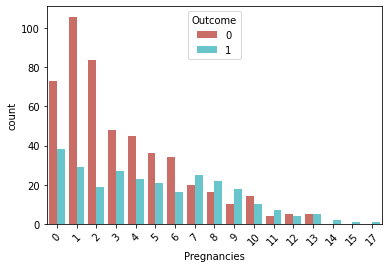

In [5]:
sns.countplot(x='Pregnancies', data=df, palette='hls', hue='Outcome')
plt.xticks(rotation=45)
plt.show()

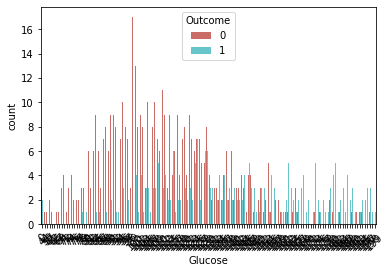

In [6]:
sns.countplot(x='Glucose', data=df, palette='hls', hue='Outcome')
plt.xticks(rotation=45)
plt.show()

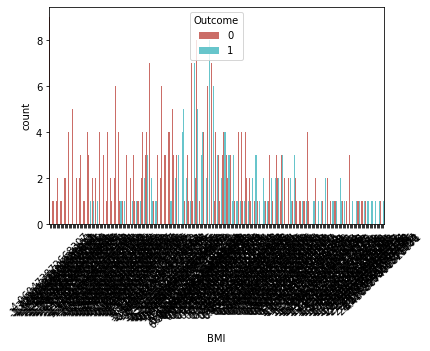

In [47]:
sns.countplot(x='BMI', data=df, palette='hls', hue='Outcome')
plt.xticks(rotation=45)
plt.show()

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#droppping all NAN
df = df.dropna()

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#Scaling continous variables
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','Age','DiabetesPedigreeFunction']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [13]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [14]:
#splitting the data for test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Sigmoid

In [15]:
# Sigmoid Function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
# Cost Function
def J(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [17]:
# Gradient Descent Function
def gradientdescent(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [18]:
# Predict Function 
def predict(X_test, theta):
    z = np.dot(X_test, theta)
    return sigmoid(z)

In [19]:
# Main Logistic Function
def logistic(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predict(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predict(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [20]:
result_sig = logistic(X_train, y_train, X_test)

In [21]:
y_preds = result_sig['Y_prediction_test']

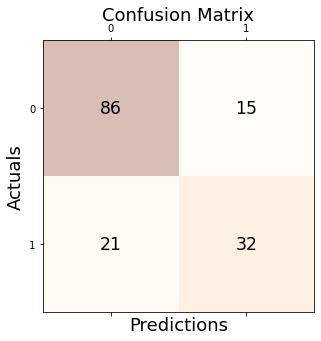

Precision: 0.761
Recall: 0.766
Accuracy: 0.766
F1 Score: 0.763


In [22]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_preds, average='weighted', labels=np.unique(y_preds)))
print('Recall: %.3f' % recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_preds))
print('F1 Score: %.3f' % f1_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))

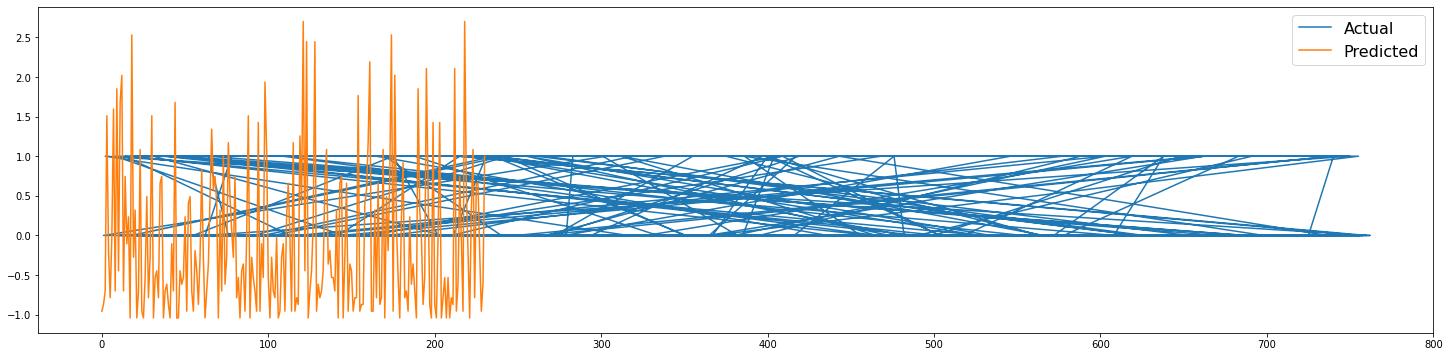

ValueError: ignored

In [40]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()


In [24]:
def diagnostic_plots(df1, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df1, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df1[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.show()

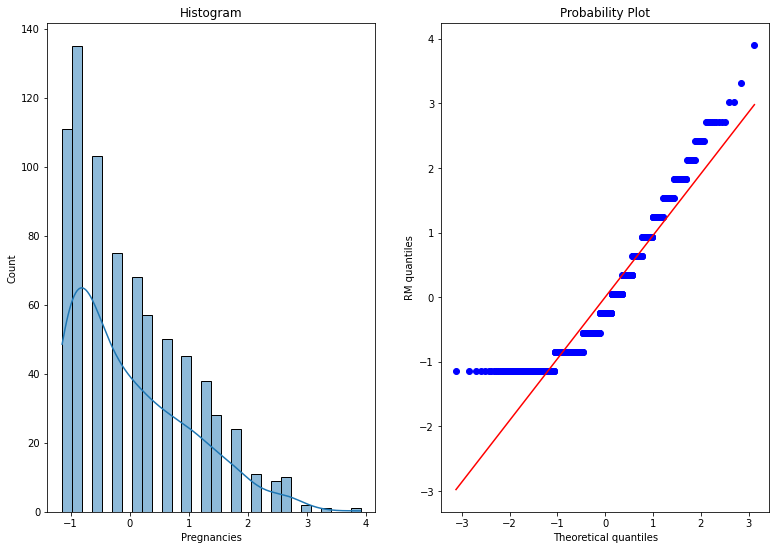

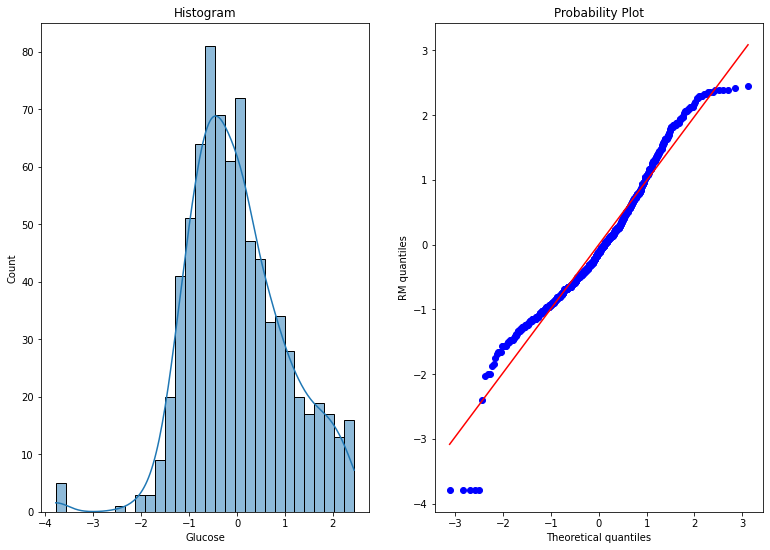

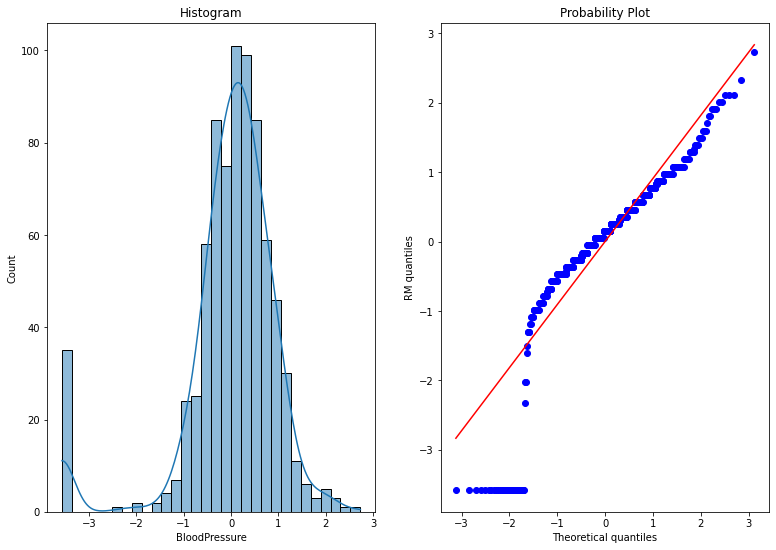

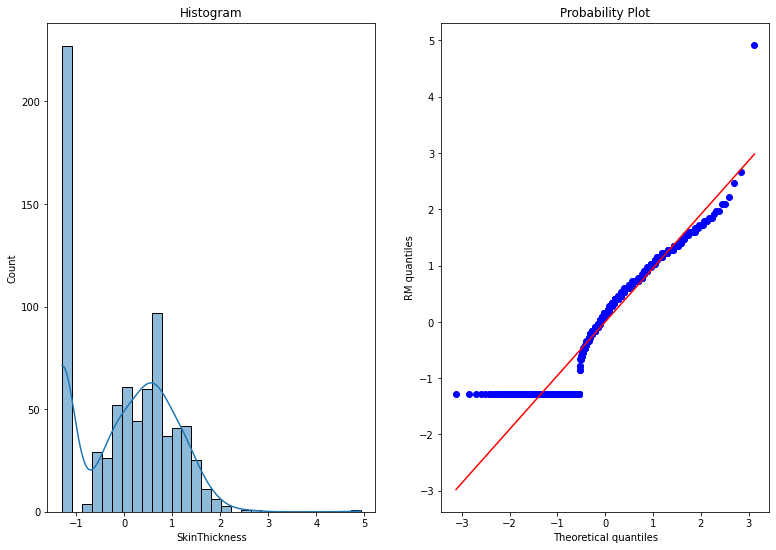

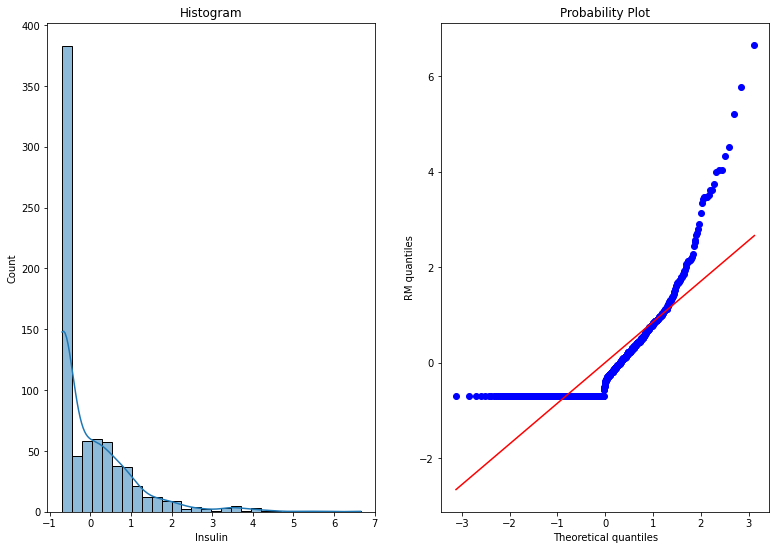

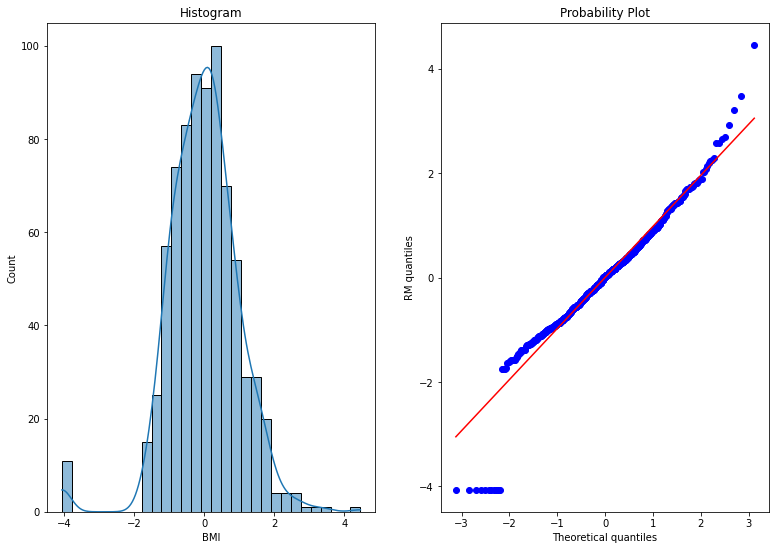

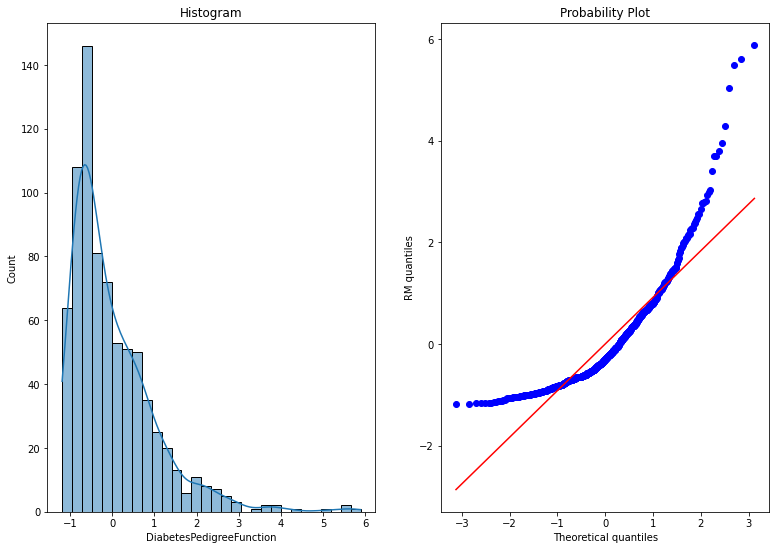

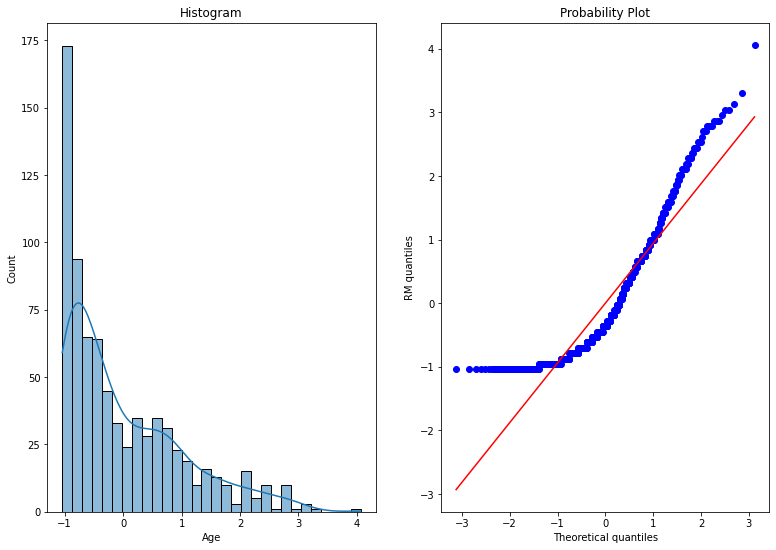

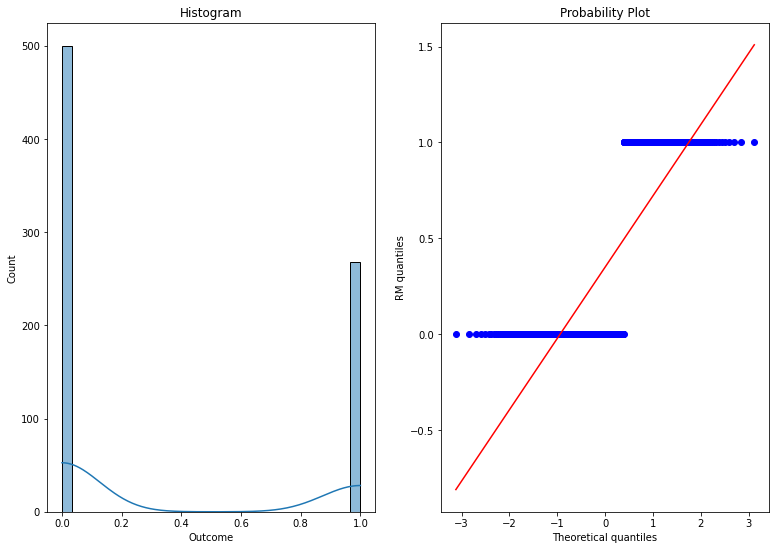

In [25]:
cols = df.columns
for i in cols:
    diagnostic_plots(df,i)

# Relu

In [26]:
def relu(x):
    return max(0.0, np.all(x))

In [27]:
# Gradient Descent Function
def gradientdescentrelu(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = relu(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [28]:
# Predict Function 
def predictrelu(X_test, theta):
    z = np.dot(X_test, theta)
    return relu(z)

In [29]:
# Main Logistic Function
def logisticrelu(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predictrelu(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predictrelu(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [30]:
result_re = logisticrelu(X_train, y_train, X_test)

In [31]:
y_predr = result_re['Y_prediction_test']

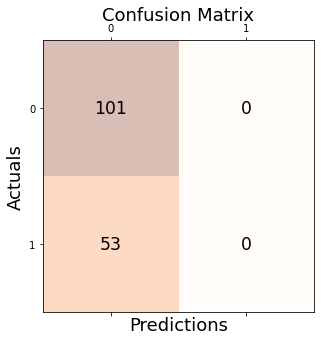

Precision: 0.656
Recall: 1.000
Accuracy: 0.656
F1 Score: 0.792


In [32]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predr)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_predr, average='weighted', labels=np.unique(y_predr)))
print('Recall: %.3f' % recall_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predr))
print('F1 Score: %.3f' % f1_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))

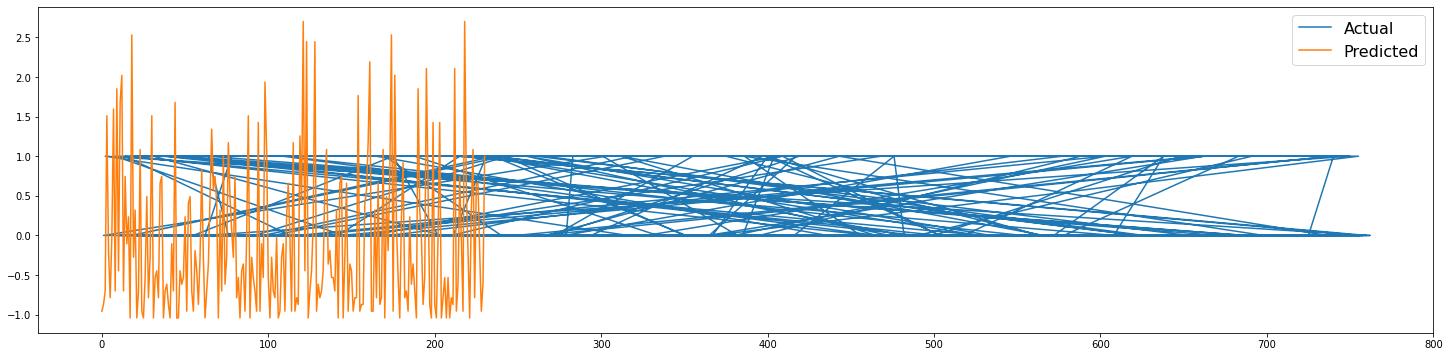

ValueError: ignored

In [39]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()


# Stochastic Gradient Descent

In [36]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=100, k=40):
    
    w = np.random.randn(1,8)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:8].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
            
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        loss = mean_squared_error(y_pred, y_tr)
        
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [37]:
# split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:8].values
        y = (np.dot(w,X_test[i])+b).item()
        
        y_pred.append(y)
    return np.array(y_pred)

w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 6.856
Epoch: 2, Loss: 2.402
Epoch: 3, Loss: 2.115
Epoch: 4, Loss: 0.396
Epoch: 5, Loss: 0.474
Epoch: 6, Loss: 0.156
Epoch: 7, Loss: 0.131
Epoch: 8, Loss: 0.070
Epoch: 9, Loss: 0.057
Epoch: 10, Loss: 0.058
Epoch: 11, Loss: 0.025
Epoch: 12, Loss: 0.020
Epoch: 13, Loss: 0.020
Epoch: 14, Loss: 0.014
Epoch: 15, Loss: 0.008
Epoch: 16, Loss: 0.004
Epoch: 17, Loss: 0.009
Epoch: 18, Loss: 0.006
Epoch: 19, Loss: 0.004
Epoch: 20, Loss: 0.003
Epoch: 21, Loss: 0.002
Epoch: 22, Loss: 0.002
Epoch: 23, Loss: 0.003
Epoch: 24, Loss: 0.001
Epoch: 25, Loss: 0.001
Epoch: 26, Loss: 0.001
Epoch: 27, Loss: 0.000
Epoch: 28, Loss: 0.000
Epoch: 29, Loss: 0.001
Epoch: 30, Loss: 0.000
Epoch: 31, Loss: 0.000
Epoch: 32, Loss: 0.000
Epoch: 33, Loss: 0.000
Epoch: 34, Loss: 0.000
Epoch: 35, Loss: 0.000
Epoch: 36, Loss: 0.000
Epoch: 37, Loss: 0.000
Epoch: 38, Loss: 0.000
Epoch: 39, Loss: 0.000
Epoch: 40, Loss: 0.000
Epoch: 41, Loss: 0.000
Epoch: 42, Loss: 0.000
Epoch: 43, Loss: 0.000
Epoch: 44, Loss: 0.0

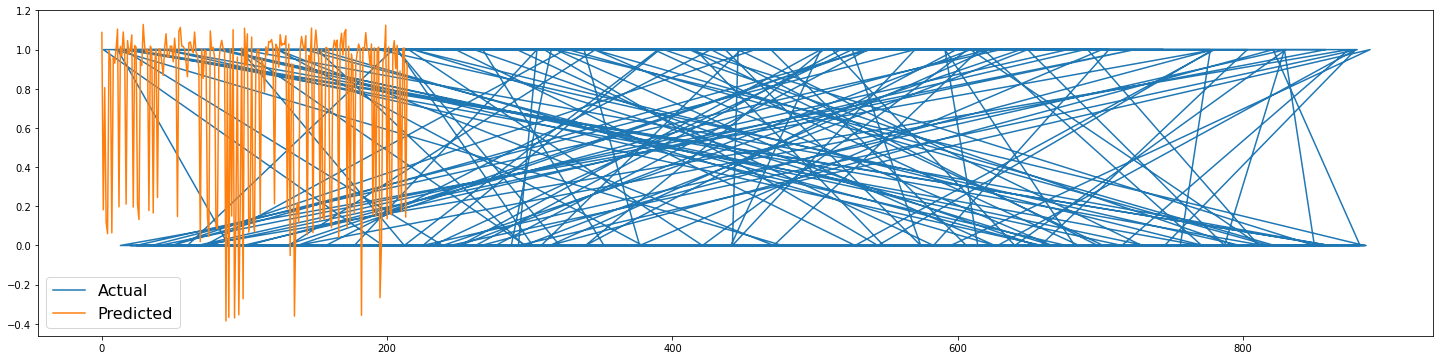

Mean Squared Error : 0.5720983174979846


In [ ]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

# Ridge

In [41]:
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

R squared error :  0.2892633194792825
Mean Absolute Error :  0.3291020363482597
Predicted values
------------------
 661    1.01
122    0.21
113    0.09
dtype: float64
Real values
------------------
 661    1
122    0
113    0
Name: Outcome, dtype: int64
Trained W         0.05
Trained b         0.35


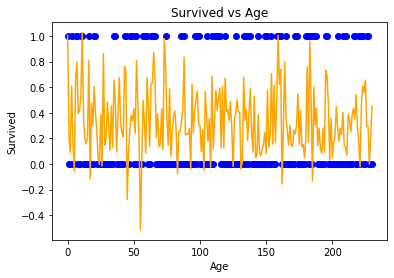

In [42]:
# Model training    
model = RidgeRegression( iterations = 1000,                             
                        learning_rate = 0.01, l2_penality = 1 )
model.fit( X_train, y_train )
# Prediction on test set
Y_pred = model.predict( X_test )    

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) )     
print( "Real values\n------------------\n", y_test[:3] )    
print( "Trained W        ", round( model.W[0], 2 ) )    
print( "Trained b        ", round( model.b, 2 ) )


# Visualization on test set    
x_test=np.arange(0,len(X_test),1)
plt.scatter( x_test, y_test, color = 'blue' )    
plt.plot( x_test, Y_pred, color = 'orange' )    
plt.title( 'Survived vs Age' )    
plt.xlabel( 'Age' )    
plt.ylabel( 'Survived' )    
plt.show()

# Lasso

In [43]:
# Lasso Regression
  
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :  
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) : 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
        
        # weight initialization  
        self.W = np.zeros( self.n ) 
        self.b = 0
        self.X = X 
        self.Y = Y
          
        # gradient descent learning
        for i in range( self.iterations ) :
            self.update_weights()
        return self
      
    # Helper function to update weights in gradient descent  
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
   
        # calculate gradients    
        dW = np.zeros( self.n )
        for j in range( self.n ) :
            if self.W[j] > 0 : 
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )           
                         + self.l1_penality ) / self.m
            else :  
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )         
                         - self.l1_penality ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

R squared error :  0.01819770238889329
Mean Absolute Error :  0.4439582210055142
Predicted values
------------------
 661    0.39
122    0.35
113    0.35
dtype: float64
Real values
------------------
 661    1
122    0
113    0
Name: Outcome, dtype: int64
Trained W         -0.0
Trained b         0.36


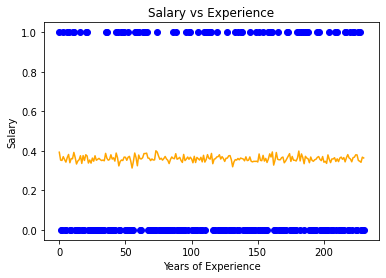

In [44]:
# Model training
      
model = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
model.fit( X_train, y_train )

# Prediction on test set
Y_pred = model.predict( X_test )

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) ) 
print( "Real values\n------------------\n", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 
plt.scatter( x_test, y_test, color = 'blue' )
plt.plot( x_test, Y_pred, color = 'orange' )
plt.title( 'Survived vs Age' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()

Reference:
    
https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

https://researchdatapod.com/python-valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtype-float64/#:~:text=If%20you%20try%20to%20pass,for%20NaN%20values%20using%20numpy

https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/

https://discuss.dizzycoding.com/valueerror-x-and-y-must-be-the-same-size/

https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/